<a href="https://colab.research.google.com/github/ibukunlola/capstone/blob/main/model3/synth_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# load packages
install.packages("Synth")
library(Synth)
library(tibble)
library(dplyr)

ERROR: ignored

## Model 1
This model uses country data where all missing values were replaced with the mean of their corresponding column. The donor pool is made up of 205 countries.

In [2]:
# load cleaned data 
dd <- read.csv(url("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/average_df.csv"))

# create unique unit numbers for each country in the dataframe
countries <- unique(dd$country_name)
count = 1
for (country in countries){
  indices <- which(dd$country_name == country)
  for (index in indices){
    dd$X[index] <- count
  }
  count = count+1
}

head(dd, n = 10)

,X,country_name,year,fdi,pol_stab,gni,gdp,pop
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,2010,-192022479,-2.579152,15884609987,15856678596,29185511
2,1,Afghanistan,2011,-51036284,-2.502060,17785698871,17805113119,30117411
3,1,Afghanistan,2012,-65684511,-2.418561,19938663919,19907317066,31161378
4,1,Afghanistan,2013,-47774027,-2.519349,20216694880,20146404996,32269592
5,1,Afghanistan,2014,-42994416,-2.411068,20494754800,20497126770,33370804
6,1,Afghanistan,2015,-166983555,-2.571222,19307190568,19134211764,34413603
7,1,Afghanistan,2016,-79585269,-2.671054,18297097175,18116562465,35383028
8,1,Afghanistan,2017,-40273161,-2.801084,19000254383,18753469630,36296111
9,1,Afghanistan,2018,-80631404,-2.763864,18240838102,18053228579,37171922


In [5]:
# generate new dataframe with per-capita data on the predictors and outcome variable
fdi_pc = dd$fdi/dd$pop
gni_pc = dd$gni/dd$pop
gdp_pc = dd$gdp/dd$pop

dd_pc = data.frame(dd$X, dd$country_name, dd$year, fdi_pc, dd$pol_stab,
                   gni_pc, gdp_pc)

# change column names
colnames(dd_pc) <- c("X", "country_name", "year", "fdi_pc", "pol_stab",
                  "gni_pc", "gdp_pc")

write.csv(dd_pc,"average_pc_df.csv", row.names = FALSE)
dd_pc

X,country_name,year,fdi_pc,pol_stab,gni_pc,gdp_pc
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2010,-6.57937699,-2.5791520,544.2636,543.3065
1,Afghanistan,2011,-1.69457739,-2.5020600,590.5454,591.1900
1,Afghanistan,2012,-2.10788211,-2.4185610,639.8518,638.8459
1,Afghanistan,2013,-1.48046579,-2.5193490,626.4937,624.3155
1,Afghanistan,2014,-1.28838419,-2.4110680,614.1523,614.2233
1,Afghanistan,2015,-4.85225435,-2.5712220,561.0337,556.0072
1,Afghanistan,2016,-2.24924980,-2.6710540,517.1151,512.0128
1,Afghanistan,2017,-1.10957235,-2.8010840,523.4791,516.6799
1,Afghanistan,2018,-2.16914810,-2.7638640,490.7155,485.6684


In [6]:
# summarize dataset
summary(dd_pc)

       X       country_name            year          fdi_pc          
 Min.   :  1   Length:2050        Min.   :2010   Min.   :-280375.21  
 1st Qu.: 52   Class :character   1st Qu.:2012   1st Qu.:   -350.68  
 Median :103   Mode  :character   Median :2014   Median :    -92.26  
 Mean   :103                      Mean   :2014   Mean   :  -1656.30  
 3rd Qu.:154                      3rd Qu.:2017   3rd Qu.:    -15.99  
 Max.   :205                      Max.   :2019   Max.   : 278715.51  
    pol_stab            gni_pc             gdp_pc       
 Min.   :-3.13097   Min.   :     229   Min.   :    228  
 1st Qu.:-0.65694   1st Qu.:    2158   1st Qu.:   2108  
 Median : 0.04672   Median :    6127   Median :   6368  
 Mean   :-0.02963   Mean   :  259395   Mean   :  18777  
 3rd Qu.: 0.84086   3rd Qu.:   19170   3rd Qu.:  19840  
 Max.   : 1.96506   Max.   :12924473   Max.   :3662586  


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 466.1304 

solution.v:
 0.1542222 0.2159245 0.2945802 0.0794696 0.04035417 0.2154493 

solution.w:
 0.7611429 0.001858597 0.006957085 0.0002038289 0.0002713739 0.0167073 0.002981288 0.007887509 0.00401271 0.0004953775 0.001248878 0.002742926 0.002505679 0.002004381 0.00117262 0.01372392 0.0008783513 0.002559385 0.002173339 0.002707603 0.009097356 0.007171629 0.00883627 0.005002122 0.003378193 0.003035896 0.002890102 0.001481555 0.006662468 0.01845709 0.05212424 0.002185834 0.003631687 0.004405941 0.0001986708 0.0009446067 0.002954854 0.001997418 0.004198347 0.003556262 0.001011936 0 0.001434873 0.001637852 0.01183662 0.003629142 0.004003942 

$tab.pred
                     Treated Synthetic Sample Mean
pol_stab              -2.033    -2.033       0.001
gdp_pc              2630.839  2630.848   15653.5

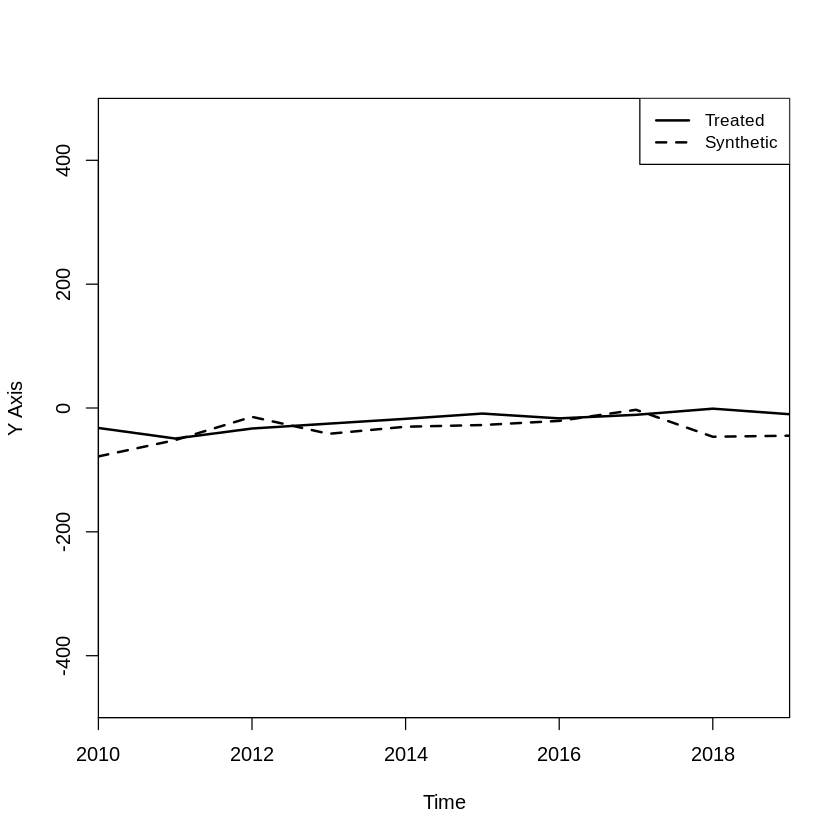

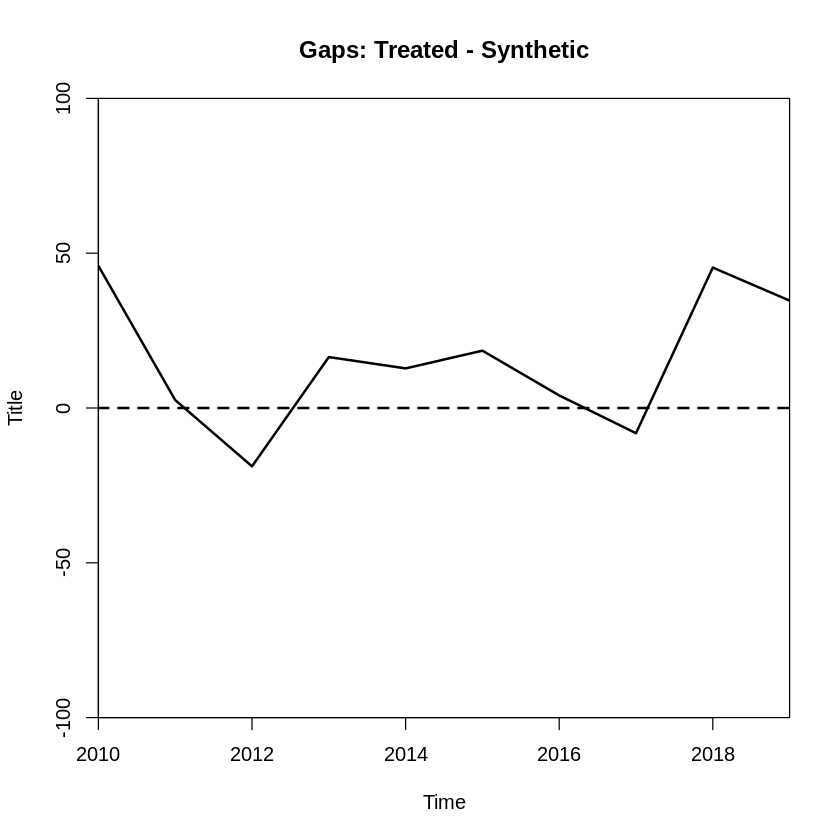

In [7]:
dataprep.out <- dataprep(dd_pc, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:48, 34))
                         )

synth.out <- synth(dataprep.out)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out, 
  synth.res = synth.out)

print(synth.tables)

path.plot(dataprep.res = dataprep.out,
          synth.res = synth.out
          ,Ylim = c(-500, 500)
          )

gaps.plot(dataprep.res = dataprep.out,
          synth.res = synth.out 
          ,Ylim = c(-100, 100)
          )

## Model 2. 
This model uses country data where all countries with missing at least one missing fdi value were removed from the donor pool. The donor pool is made up of 166 countries.

In [8]:
# load cleaned data 
dd2 <- read.csv(url("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/nan_removed_df.csv"))

# create unique unit numbers for each country in the dataframe
countries2 <- unique(dd2$country_name)
count = 1
for (country in countries2){
  indices <- which(dd2$country_name == country)
  for (index in indices){
    dd2$X[index] <- count
  }
  count = count+1
}

head(dd2, n = 10)

,X,country_name,year,fdi,pol_stab,gni,gdp,pop
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,2010,-192022479,-2.579152,15884609987,15856678596,29185511
2,1,Afghanistan,2011,-51036284,-2.502060,17785698871,17805113119,30117411
3,1,Afghanistan,2012,-65684511,-2.418561,19938663919,19907317066,31161378
4,1,Afghanistan,2013,-47774027,-2.519349,20216694880,20146404996,32269592
5,1,Afghanistan,2014,-42994416,-2.411068,20494754800,20497126770,33370804
6,1,Afghanistan,2015,-166983555,-2.571222,19307190568,19134211764,34413603
7,1,Afghanistan,2016,-79585269,-2.671054,18297097175,18116562465,35383028
8,1,Afghanistan,2017,-40273161,-2.801084,19000254383,18753469630,36296111
9,1,Afghanistan,2018,-80631404,-2.763864,18240838102,18053228579,37171922


In [11]:
# generate new dataframe with per-capita data on the predictors and outcome variable
fdi_pc2 = dd2$fdi/dd2$pop
gni_pc2 = dd2$gni/dd2$pop
gdp_pc2 = dd2$gdp/dd2$pop

dd_pc2 = data.frame(dd2$X, dd2$country_name, dd2$year, fdi_pc2, dd2$pol_stab,
                   gni_pc2, gdp_pc2)

# change column names
colnames(dd_pc2) <- c("X", "country_name", "year", "fdi_pc", "pol_stab",
                  "gni_pc", "gdp_pc")

write.csv(dd_pc2,"nan_removed_pc_df.csv", row.names = FALSE)
dd_pc2

X,country_name,year,fdi_pc,pol_stab,gni_pc,gdp_pc
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2010,-6.57937699,-2.5791520,544.2636,543.3065
1,Afghanistan,2011,-1.69457739,-2.5020600,590.5454,591.1900
1,Afghanistan,2012,-2.10788211,-2.4185610,639.8518,638.8459
1,Afghanistan,2013,-1.48046579,-2.5193490,626.4937,624.3155
1,Afghanistan,2014,-1.28838419,-2.4110680,614.1523,614.2233
1,Afghanistan,2015,-4.85225435,-2.5712220,561.0337,556.0072
1,Afghanistan,2016,-2.24924980,-2.6710540,517.1151,512.0128
1,Afghanistan,2017,-1.10957235,-2.8010840,523.4791,516.6799
1,Afghanistan,2018,-2.16914810,-2.7638640,490.7155,485.6684


In [12]:
# summarize dataset
summary(dd_pc2)

       X         country_name            year          fdi_pc          
 Min.   :  1.0   Length:1660        Min.   :2010   Min.   :-280375.21  
 1st Qu.: 42.0   Class :character   1st Qu.:2012   1st Qu.:   -292.37  
 Median : 83.5   Mode  :character   Median :2014   Median :    -80.99  
 Mean   : 83.5                      Mean   :2014   Mean   :   -317.24  
 3rd Qu.:125.0                      3rd Qu.:2017   3rd Qu.:    -14.62  
 Max.   :166.0                      Max.   :2019   Max.   : 278715.51  
    pol_stab             gni_pc            gdp_pc       
 Min.   :-2.810035   Min.   :    314   Min.   :    316  
 1st Qu.:-0.594227   1st Qu.:   2226   1st Qu.:   2174  
 Median : 0.047734   Median :   5677   Median :   5915  
 Mean   :-0.009758   Mean   :  17318   Mean   :  17759  
 3rd Qu.: 0.781028   3rd Qu.:  16856   3rd Qu.:  17543  
 Max.   : 1.639301   Max.   :4359868   Max.   :4359275  


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 15.42211 

solution.v:
 0.7371825 0.006549775 0.01842066 0.01133154 0.1123181 0.1141975 

solution.w:
 0.7785269 0.003924704 0.01089149 0.007085591 0.001636351 0.004284184 0.005029335 0.0006186596 0.002799806 6.2552e-06 0.006995949 0.002406149 0.01170559 0.004155531 0.0004036341 0.004984251 0.003674397 0.0009358863 0.001804573 0.005600662 0.006603672 0.001604389 0.005837854 0.001868869 0.003548772 0.006982718 0.002310417 0.004762613 0.008170788 0.001063052 0.002907848 0.006734908 0.01575353 0.002438229 0.01044366 0.002555768 0.001468661 0.002859283 0.009147354 0.004744599 0.001578864 0.0040836 0.005605266 0.01254641 0.004270395 0.006756416 0.00588217 

$tab.pred
                     Treated Synthetic Sample Mean
pol_stab              -2.033    -2.033       0.107
gdp_pc              2630.839  2623.165

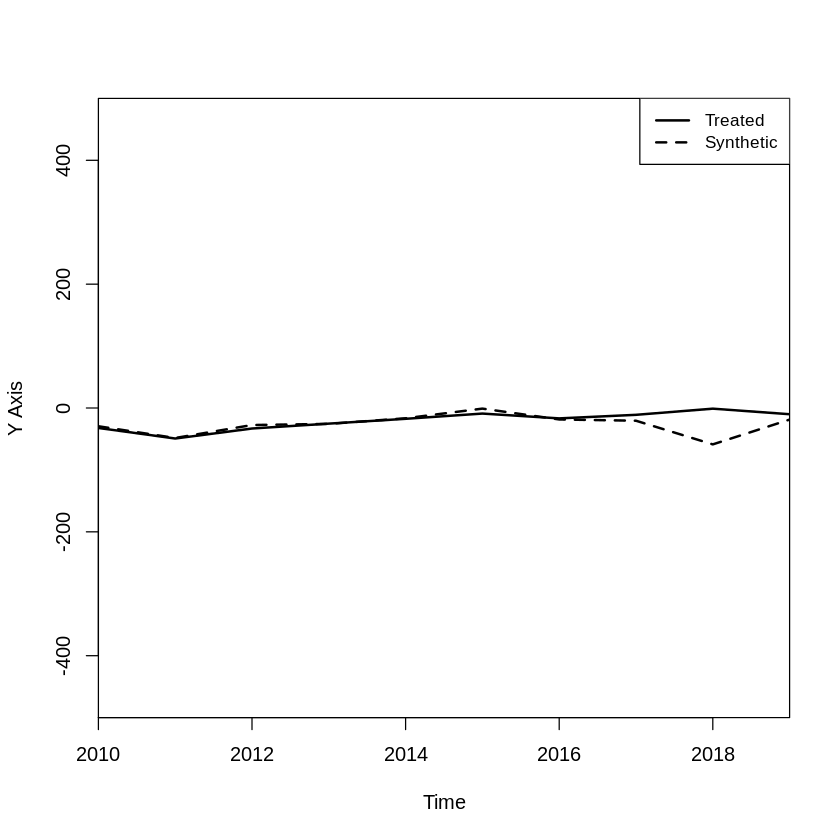

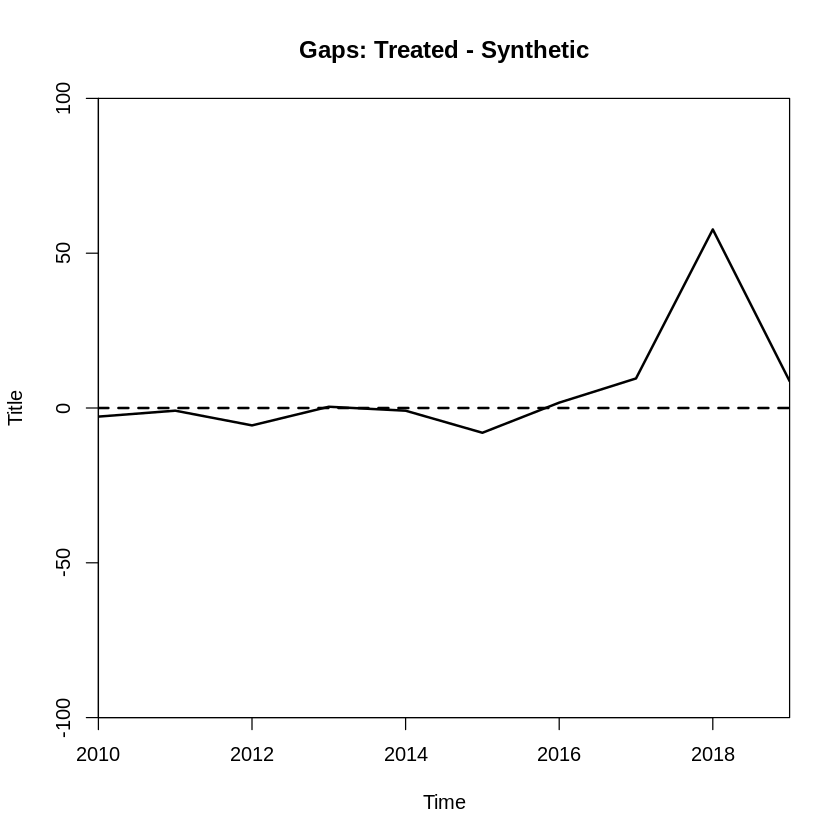

In [13]:
dataprep.out2 <- dataprep(dd_pc2, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:48, 34))
                         )

synth.out2 <- synth(dataprep.out2)

synth.tables2 <- synth.tab(
  dataprep.res = dataprep.out2, 
  synth.res = synth.out2)

print(synth.tables2)

path.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2
          ,Ylim = c(-500, 500)
          )

gaps.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2 
          ,Ylim = c(-100, 100)
          )